Case Study 3: Build a spam classifier using naive Bayes and clustering. You will have to create your own dataset from the input messages. Be sure to document how you created your dataset.

In [142]:
# Clustering and Naive bayes 
# Predict Spam or Not Spam 
# Determine the threshold 
# Naive Bayes as the email filter
# you have to create your own dataset from the data given 
# Accuracy will be close to 100% 
# TFIDF or Bagging can be used either will work well 

# zip file has spam messages
# theres non spam and spam 
# if its spam if its ham
# strictly binary two class classification problem doesnt matter if its hard
# text files
# text apart, cut the header off , you can use the email package 
# if its in the ham folder - assign a zero 
# shuffle when you create your splits
# spam - assign a 1 
# you just use a giant for loop and thats it - to walk through the files 
# computer makes short work of it 


In [1]:
# Start using the email package to get the simpler ones, but there are more you have to delve into. 


# 1. Load the data
# but we really want the email message itself we dont want the header. 
# based off the text of the email classify this. 
# 
import os
import email 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score


import numpy as np



In [2]:
import os

# Set the directory path
directory = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_study3/"

# Change the current working directory
os.chdir(directory)
os.listdir("/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_study3/SpamAssassinMessages/")

['spam', 'hard_ham', 'spam_2', 'easy_ham', 'easy_ham_2']

In [3]:
# # join email and file together 
# # you need to parse the HTML email and get to it
# # encoding had to be set
# # introduce some error handling with try and except 
# # DERP is a placeholder for the error handling
# # counting different codec types
# # Counter a fast way to count things - boiler plate 
# # 


from collections import Counter
types = Counter()
targets=[]
text=[]
for root,dirs,files in os.walk("."):
    for file in files:
        if "ipynb" in file:
            pass
        else:
            with open(os.path.join(root,file), "r",encoding='latin-1') as f:
                try:
                    tmp = email.message_from_file(f)
                    type_ = tmp.get_content_type()
                    if type_== 'text/html':
                        print("Need to parse HTML")
                    types[type_]+=1
                    tmp = tmp.get_payload().replace("\n"," ")
                except:
                    pass
                    tmp = "DERP"
                text.append(tmp)
            if "spam" in root:
                targets.append(1)
            else:
                targets.append(0)

    

Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to parse HTML
Need to pars

In [4]:
print(root, file, types)

./SpamAssassinMessages/easy_ham_2 00747.352d424267d36975a7b40b85ffd0885e Counter({'text/plain': 7417, 'text/html': 1193, 'multipart/alternative': 326, 'multipart/signed': 180, 'multipart/mixed': 179, 'multipart/related': 56, 'multipart/report': 5, 'text/plain charset=us-ascii': 1})


----------------

In [5]:
import os
import email
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


types = Counter()
targets = []
text_data = []

# Function to extract text from email parts
def extract_text_from_email(msg):
    text_parts = []
    if msg.is_multipart():
        for part in msg.get_payload():
            text_parts.extend(extract_text_from_email(part))
    else:
        content_type = msg.get_content_type()
        if content_type == 'text/plain':
            text_parts.append(msg.get_payload(decode=True).decode('latin-1'))
        elif content_type == 'text/html':
            html_content = msg.get_payload(decode=True).decode('latin-1')
            soup = BeautifulSoup(html_content, 'html.parser')
            text_parts.append(soup.get_text())
    return text_parts


In [6]:
# Walk through the directory and parse files
for root, dirs, files in os.walk("."):
    for file in files:
        if "ipynb" in file:
            continue
        try:
            with open(os.path.join(root, file), "r", encoding='latin-1') as f:
                msg = email.message_from_file(f)
                type_ = msg.get_content_type()
                types[type_] += 1
                text_parts = extract_text_from_email(msg)
                combined_text = ' '.join(text_parts).replace("\n", " ")
                text_data.append(combined_text)
                if "spam" in root:
                    targets.append(1)
                else:
                    targets.append(0)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            text_data.append("DERP")
            targets.append(0)

# Ensure the combined text length
processed_text_data = []
for text in text_data:
    if len(text) > 9200:
        processed_text_data.append(text[:9200])
    else:
        processed_text_data.append(text.ljust(9200))


vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(processed_text_data)


print(X_features.toarray())
print(vectorizer.get_feature_names_out())




[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '0000' ... 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿò'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿô'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó']


In [7]:
# # Select a row index to inspect
# row_index = 0  # Change this to the row index you want to inspect

# print("Email Content:")
# print(text_data[row_index])

# print("\nFeatures and Frequencies:")
# for feature_name, frequency in zip(vectorizer.get_feature_names_out(), X_features.toarray()[row_index]):
#     if frequency > 0:
#         print(f"{feature_name}: {frequency}")


In [8]:
print(len(targets))
types

9357


Counter({'text/plain': 7417,
         'multipart/alternative': 326,
         'text/html': 1193,
         'multipart/mixed': 179,
         'multipart/related': 56,
         'multipart/signed': 180,
         'text/plain charset=us-ascii': 1,
         'multipart/report': 5})

Cross-validation scores: [0.90918803 0.98824786 0.98770711 0.99358632 0.98931053]
Mean cross-validation score: 0.973607970508024
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6958
           1       0.93      0.97      0.95      2399

    accuracy                           0.97      9357
   macro avg       0.96      0.97      0.97      9357
weighted avg       0.97      0.97      0.97      9357



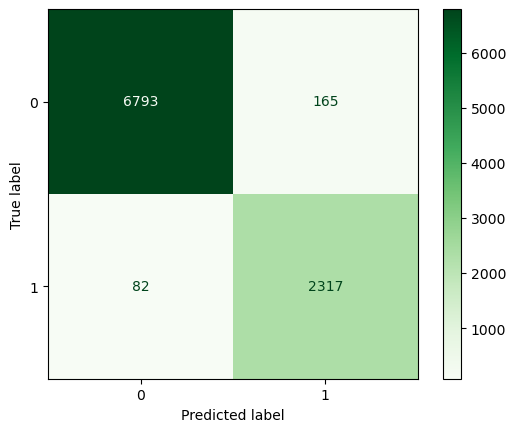

[[-3.32848031e-02 -3.41925059e+00]
 [-1.93531621e+02  0.00000000e+00]
 [-1.82738528e+00 -1.75346205e-01]
 ...
 [ 0.00000000e+00 -9.52629356e+01]
 [ 0.00000000e+00 -2.47999785e+02]
 [ 0.00000000e+00 -1.62697017e+02]]
[[9.67263041e-001 3.27369592e-002]
 [8.91835688e-085 1.00000000e+000]
 [1.60833553e-001 8.39166447e-001]
 ...
 [1.00000000e+000 4.24456072e-042]
 [1.00000000e+000 1.97270468e-108]
 [1.00000000e+000 2.19575292e-071]]
Email 1:
Text: tim cabaza                                             t i m   c a b a z a                                                                                                                              ...
Actual target: Not Spam
Predicted probabilities: Not Spam: 0.9673, Spam: 0.0327


Email 2:
Text: PK    ! ç!]p  ×  [Content_Types].xml ¢(                                                                                                                                                 ...
Actual target: Not Spam
Predicted probabilities: Not

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model = MultinomialNB(alpha=1.0)
cv_scores = cross_val_score(model, X_features, targets, cv=5)


print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
# # Get prediction probabilities using cross-validation
# model.fit(X_features, targets)
# model.predict_log_proba(X_features)
# Generate cross-validated predictions
predictions = cross_val_predict(model, X_features, targets, cv=5)

# Print the classification report
print(classification_report(targets, predictions))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(targets, predictions, cmap='Greens')
plt.show()

# Get prediction probabilities using cross-validation
# Fit the model on the entire dataset
model.fit(X_features, targets)

# Get the log probabilities for each class
log_proba = model.predict_log_proba(X_features)
print(log_proba)

# Get the predicted class
predicted_class = model.predict(X_features)
predicted_class


proba = np.exp(log_proba)
# Print the converted probabilities
print(proba)
# Example of inspecting a few instances
for i in range(10):  # Change the range if you want to inspect more instances
    print(f"Email {i+1}:")
    print(f"Text: {processed_text_data[i][:200]}...")  # Show the first 200 characters
    print(f"Actual target: {'Spam' if targets[i] == 1 else 'Not Spam'}")
    print(f"Predicted probabilities: Not Spam: {proba[i][0]:.4f}, Spam: {proba[i][1]:.4f}")
    print("\n")


In [23]:
# Normalize probabilities to sum up to 1
proba /= np.sum(proba)

# Print the probabilities
for i, prob in enumerate(proba):
    print(f"Class {i}: {prob:.4f}")


Class 0: 0.3100
Class 1: 0.6900


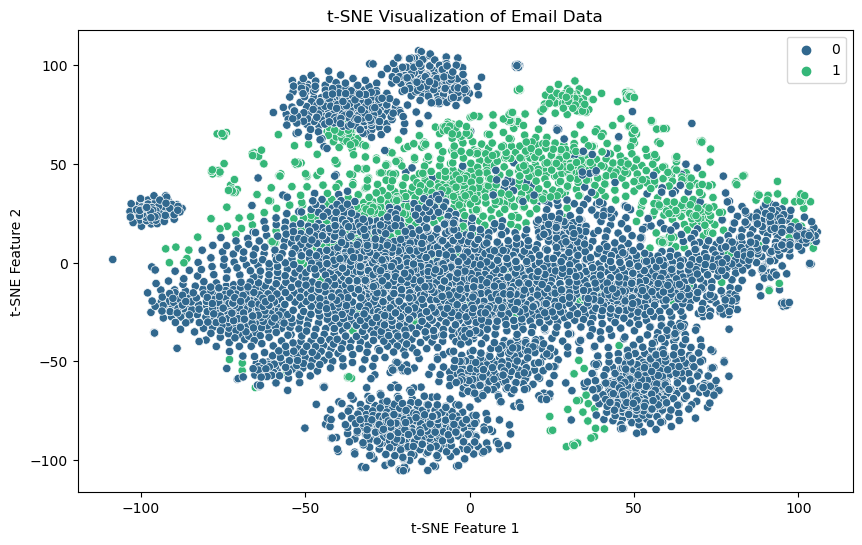


Sample parsed email content:

Target: 0
Content:
tim cabaza                                             t i m   c a b a z a                                                                                                                                                                                                                                                                                                                                                                                                                                          ...

Target: 0
Content:
PK    ! ç!]p  ×  [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                                                                                                                       

In [12]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict

# Reduce dimensionality using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_features.toarray())

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=targets, palette='viridis')
plt.title('t-SNE Visualization of Email Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Additional logging for verification
print("\nSample parsed email content:")
for i, (t, txt) in enumerate(zip(targets, processed_text_data)):
    if i < 5:  # Print the first 5 samples for inspection
        print(f"\nTarget: {t}")
        print(f"Content:\n{txt[:500]}...")  # Print the first 500 characters of the text
    else:
        break

# Print the counter to verify email types
print("\nCounter of email types:")
print(types)

-------


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6957
           1       0.93      0.97      0.95      2399

    accuracy                           0.97      9356
   macro avg       0.96      0.97      0.97      9356
weighted avg       0.97      0.97      0.97      9356



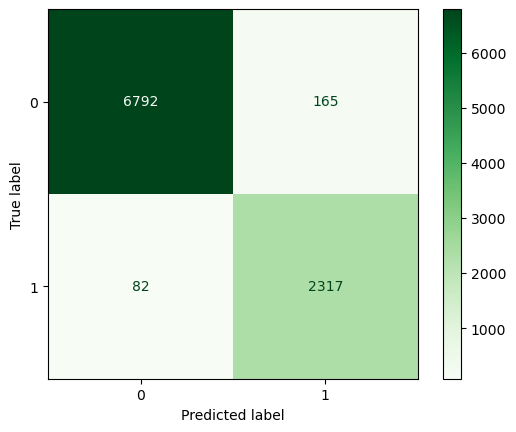

In [ ]:

# from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# from sklearn.model_selection import cross_val_score, cross_val_predict
# import matplotlib.pyplot as plt
# # Generate cross-validated predictions
# predictions = cross_val_predict(model, X_features, targets, cv=5)


# print(classification_report(targets, predictions))

# # Plot the confusion matrix
# ConfusionMatrixDisplay.from_predictions(targets, predictions, cmap='Greens')
# plt.show()

In [ ]:
# targets
# and our text 
# nice thing about naive bayes, feature extraction sklearn - both your counter vectorizer and tdidf vectorizer - you can use the text directly. -- clean it up and return all the counts, return a sparse matrix, a set of ones an dzeros and it will tell you your word counts. 
#text - trun into a number and then you can use it in the naive bayes classifier- 
# count vectorizer we use lowercase, tokenzie by space, ngrams- word combos, you can analyze by syllable word, does all the heavy lfiting for you. 
# or you could use tfidf - this starts to normalize, certain words are important, words that occur in those emails, looks at words that occur semi frequently, normalize the data (we, the, etc) normalize by inverse document frequency-  look for flagged words rare words, by normalizing between different classes, however for this case you will be pushing higher accuracy, you would see a slight boost in accuracy. 
# then you go to the naive bayes: you get to figure out which one will work, so use categoricalNB - smoothing vectorizer is in there- this helps smooth out the zeroes indeterminant fractions, infintieis from popping up better for smaller parameter - but naive bayes doesnt have hyperparemters to tune really. 
# get clasess
# get teh features
# get the prediction - tells you class
# log probability
# proabbility - chance this is a spam message, we can play with that proabbility and play with that threshold. 
# arg_max - gives you the index of the highest probability 
# predict_proba - gives you the probability of each class - the raw data 
# you want 95% spam anything less use predict proba
# you can get these CV predict_proba this will help you vary the threshold back and forth. 
# gaussian naive bayes when you have continous variables - you can use multinomialNB - you can use the count vectorizer, you can use the tfidf vectorizer
# USE MULTONIMIALNB For your model 


_______________________________________________________________________________________

In [ ]:
# Live Lecture 5

# Clustering 
# only time we are going to do unsupervised, no targets and we find relationships within the data, the idea of clustering has this concept of distances 
# what are these different distances and when to use them? 
# find things that are grouped together, using distance
# clustering great for tight concise groups
# clusteirng is a group of models not a single model 
# db scan is a big one - finds clusters and outliers which is why its favored, they are very good at these noncomapct groups, OPTICS as well. Can also double as an outlier detector. 
# 
# k means has a problem, doesnt have irregular groups, designed for seperate groups, there are 3 clusters or 4 clusters
# Kmeans finds the mean center. 
# DBSCan - are there points nearby then they are part of the same cluster and doesnt have to know how many clusters there are ahead of time. 

# Distance 
# most often normal distnace that we find on flat plane, shortest distance is a striagiht line
# vectors abstract plane in some dimension, things nearby still ahve a small distnace
# if youa are in agraph or in a network. 
# Manhatten distance - no diagonals, only up down left right, taxi cab distance, shortest path not being unique, graph network, connected through hops - make look physically nodes are nearby but its the hops connecting them
# Manhatten distnace - its not unique, shortest path is a fun part of the mahatten distance, (first power abs value to put into euclidean distance), p=1
# Euclidean distance - our normal distance, unique p=2
# Minkowski distance - p=infinity generalization of the two above, you can change the power of the distance as p gets larger the corner point is the same distance as the others ... cosine distance 

# cosine distance from 2 to -2 
# cosine distance is good for text data, if you have a lot of zeros in your data
# cosine similarity is the opposite of cosine distance, 1 is the same, 0 is perpendicular, -1 is opposite




_______________________________________________________________________________________

_______________________________________________________________________________________